# Classificação de Padrões

3 - Considere um problema de classificação de padrões constituído de oito padrões. A
distribuição dos padrões forma um círculo centrado na origem de raio unitário e contido no
círculo um losango também centrado na origem e com lados iguais a raiz de 2. Os dados das
classe C1, C2, C3, C4 corresponde aos quatro setores do losango e as outras quatro classes
correspondem aos setores delimitados pelo círculo e os lados do losango. Após gerar
aleatoriamente dados que venham formar estas distribuições de dados, selecione um conjunto
de treinamento e um conjunto de validação. Treine uma rede perceptron para classificar os
padrões associados a cada uma das classes. Verifique o desempenho do classificador usando
o conjunto de validação e calculando a matriz de confusão.

### Importando Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
from math import sqrt
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

### Gerando Dados Aleatórios Para Classificação

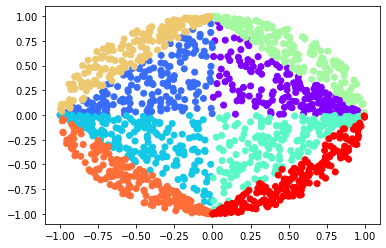

In [2]:
def Gerar_C1(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(0, 1)
        y = random.uniform(0, -x + 1)
        points.append([x, y, 0])
    return points

def Gerar_C2(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(-1, 0)
        y = random.uniform(0, x + 1)
        points.append([x, y, 1])
    return points

def Gerar_C3(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(-1, 0)
        y = random.uniform(-1-x, 0)
        points.append([x, y, 2])
    return points

def Gerar_C4(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(0, 1)
        y = random.uniform(-1+x, 0)
        points.append([x, y, 3])
    return points

def Gerar_C5(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(0, 1)
        y = random.uniform(1 - x, sqrt(1 - x**2))
        points.append([x, y, 4])
    return points

def Gerar_C6(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(-1, 0)
        y = random.uniform(x+1, sqrt(1 - x**2))
        points.append([x, y, 5])
    return points

def Gerar_C7(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(-1, 0)
        y = random.uniform(-sqrt(1 - x**2), -1-x)
        points.append([x, y, 6])
    return points

def Gerar_C8(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(0, 1)
        y = random.uniform(-sqrt(1 - x**2), -1+x)
        points.append([x, y, 7])
    return points

def generate(instancias):
    points = Gerar_C1(instancias) + Gerar_C2(instancias) + Gerar_C3(instancias) + Gerar_C4(instancias) + Gerar_C5(instancias) + Gerar_C6(instancias) + Gerar_C7(instancias) + Gerar_C8(instancias)
    return points

colors = cm.rainbow(np.linspace(0, 1, 8))

res = generate(200)
#print(res)

data_X = [[row[0], row[1]] for row in res]
data_X = np.array(data_X)
data_y = [row[2] for row in res]
data_y = np.array(data_y)

plt.scatter(data_X[:,0], data_X[:,1], color=colors[data_y])

#plt.legend()
_ = plt.ylim()

data_X, data_y = shuffle(data_X, data_y, random_state=0)


train_X, val_X = np.split(data_X, 2)
train_y, val_y = np.split(data_y, 2)
#print(data_X)
#print(data_y)

val_X, test_X = np.split(val_X, 2)
val_y, test_y = np.split(val_y, 2)


In [3]:
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)


In [4]:
ann = tf.keras.models.Sequential()

In [5]:
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
print(test_X)

[[-0.52273195 -1.48106661]
 [-0.26598599 -1.5316561 ]
 [ 0.55935446  1.53233138]
 [ 1.00543339 -0.63205436]
 [ 1.62727817  0.06546978]
 [-1.21341883  1.18846184]
 [-1.11634066 -0.76752576]
 [ 0.33833911  0.29003111]
 [-0.7279008  -0.24202526]
 [ 0.26469223  1.6142176 ]
 [ 0.85336704  1.01609909]
 [ 0.1514881  -0.17353298]
 [ 0.28127022  1.74499814]
 [-1.19607018 -1.2219198 ]
 [-1.6507783  -0.08095011]
 [ 1.07899146 -0.77278613]
 [-0.18938849  0.40278311]
 [ 0.79503494  0.65313178]
 [-0.40129601  0.3637577 ]
 [-0.60328419  0.97429654]
 [ 1.66753216 -0.16698304]
 [ 0.56651307 -0.43261023]
 [-0.97528099 -1.07757594]
 [-1.25178755  0.11006471]
 [-1.38203543 -0.55647769]
 [ 1.35685518 -0.3956213 ]
 [-1.5180117   0.317689  ]
 [-0.1101353  -0.0496569 ]
 [-0.45039547 -0.3286654 ]
 [-0.21003386 -0.86574235]
 [-0.8788826  -0.21667064]
 [-1.67687459  0.59068624]
 [ 1.05447344  0.81506857]
 [-0.09909699 -1.67230145]
 [-1.74423096  0.02998887]
 [ 1.12334394 -0.95633745]
 [-1.04830643 -0.78260938]
 

In [6]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [7]:
#ann.fit(X_train, y_train, batch_size = 32, epochs = 600)
history = ann.fit(train_X, train_y, validation_split=0.2, epochs=1000, batch_size=50, verbose=0)

In [8]:
y_pred = ann.predict(test_X)


In [9]:
cm= confusion_matrix(
    test_y.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

AxisError: axis 1 is out of bounds for array of dimension 1

In [10]:
accuracy_score(test_y, y_pred)


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


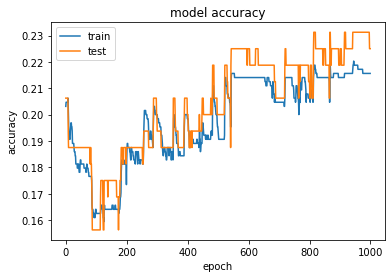

In [11]:
# summarize history for accuracy
print(history.history.keys())  
plt.figure(1)  

# summarize history for accuracy  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

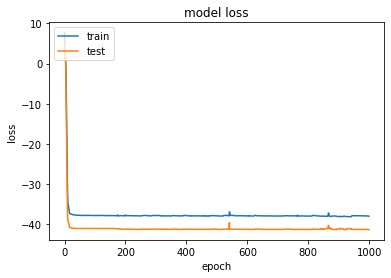

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()